In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import string
import emoji
import nltk
from textblob import TextBlob
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier

# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package words to /Users/jtangesq/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
#Dataset from https://www.kaggle.com/kaushiksuresh147/covidvaccine-tweets that contains historical twitter data from last year to August 2021
df = pd.read_csv('../Resources/covidvaccine.csv',encoding = 'ISO-8859-1') 
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree OâConnor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [3]:
n_df = df.drop(columns = ['user_name', 'user_location','user_description','user_created',
                         'user_followers','user_friends','user_favourites','source','is_retweet'], axis = 1)
n_df

,user_verified,date,text,hashtags
0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine']
1,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid..."
2,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN
3,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN
4,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN
...,...,...,...,...
297843,False,2021-08-21 00:03:17,PolitiFact â No evidence that #CovidVaccine ...,"['CovidVaccine', 'COVID19', 'factsmatter']"
297844,False,2021-08-21 00:03:16,PolitiFact â No evidence that #CovidVaccine ...,"['CovidVaccine', 'COVID19', 'factsmatter']"
297845,False,2021-08-21 00:02:30,7th day on service. Last patient that I rounde...,"['COVID19', 'hospitalistlife', 'Vaccinate', 'C..."
297846,False,2021-08-21 00:02:00,âWhat to Know About Boosters If You Got the ...,"['COVID19', 'covidvaccine', 'vaxnews', 'vaccin..."


In [4]:
#regex the hashtags 
#n_df['hashtags'] = n_df['hashtags'].apply(lambda x: re.sub('\[.*?\]',' ', str(x)))
n_df['hashtags'] = n_df['hashtags'].str.replace("[^a-zA-Z#]", " ")
n_df.head()

/Users/jtangesq/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_verified,date,text,hashtags
0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,CovidVaccine
1,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,CoronavirusVaccine CoronaVaccine Covid...
2,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN
3,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN
4,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN


In [5]:
#tweet text cleaning option 2: 
def clean_tweet(temp):
    
    #for temp in range(0, len(n_df)) :
         #if type(temp) == float:
         #    return ""
         #else: 
            #print(temp)
    temp = str(temp).lower()
    temp = re.sub("'", "", str(temp)) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", str(temp))
    temp = re.sub("#[A-Za-z0-9_]+","", str(temp))
    temp = re.sub(r"www.\S+", "", temp)
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    stopwords = stop_words
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp
n_df['text'] = n_df['text'].map(lambda x: clean_tweet(x))
n_df.head()

,user_verified,date,text,hashtags
0,False,18-08-2020 12:55,australia manufacture covid 19 vaccine give ci...,CovidVaccine
1,False,18-08-2020 12:55,australia good,CoronavirusVaccine CoronaVaccine Covid...
2,False,18-08-2020 12:46,deaths due covid 19 affected countries read,NaN
3,False,18-08-2020 12:45,stay safe di amp da,NaN
4,False,18-08-2020 12:45,passes leadership country voucher something w,NaN


In [6]:
#remove short words less than three letters 
n_df['text'] = n_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [7]:
tokenized_tweets = n_df['text'].apply(lambda x: x.split())

In [8]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


n_df['tokenized']= tokenized_tweets
n_df.head()

,user_verified,date,text,hashtags,tokenized
0,False,18-08-2020 12:55,australia manufacture covid vaccine give citiz...,CovidVaccine,"[australia, manufactur, covid, vaccin, give, c..."
1,False,18-08-2020 12:55,australia good,CoronavirusVaccine CoronaVaccine Covid...,"[australia, good]"
2,False,18-08-2020 12:46,deaths covid affected countries read,NaN,"[death, covid, affect, countri, read]"
3,False,18-08-2020 12:45,stay safe,NaN,"[stay, safe]"
4,False,18-08-2020 12:45,passes leadership country voucher something,NaN,"[pass, leadership, countri, voucher, someth]"


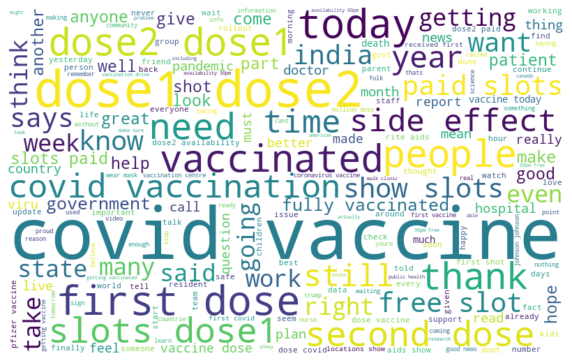

In [9]:
#plotting all words out of text
all_words = ' '.join([text for text in n_df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Text Classification using TextBlob

In [10]:
#The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement 
#and -1 means a negative statement.
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].
n_df['polarity'] = n_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
n_df['subjectivity'] = n_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
n_df.head()

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity
0,False,18-08-2020 12:55,australia manufacture covid vaccine give citiz...,CovidVaccine,"[australia, manufactur, covid, vaccin, give, c...",0.4,0.8
1,False,18-08-2020 12:55,australia good,CoronavirusVaccine CoronaVaccine Covid...,"[australia, good]",0.7,0.6
2,False,18-08-2020 12:46,deaths covid affected countries read,NaN,"[death, covid, affect, countri, read]",0.0,0.0
3,False,18-08-2020 12:45,stay safe,NaN,"[stay, safe]",0.5,0.5
4,False,18-08-2020 12:45,passes leadership country voucher something,NaN,"[pass, leadership, countri, voucher, someth]",0.0,0.0


In [11]:
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [12]:
# We create a column with the result of the analysis:
n_df['sentiment'] = np.array([ analyze_sentiment(tweet) for tweet in n_df['text'] ])
n_df

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity,sentiment
0,False,18-08-2020 12:55,australia manufacture covid vaccine give citiz...,CovidVaccine,"[australia, manufactur, covid, vaccin, give, c...",0.4,0.800000,1
1,False,18-08-2020 12:55,australia good,CoronavirusVaccine CoronaVaccine Covid...,"[australia, good]",0.7,0.600000,1
2,False,18-08-2020 12:46,deaths covid affected countries read,NaN,"[death, covid, affect, countri, read]",0.0,0.000000,0
3,False,18-08-2020 12:45,stay safe,NaN,"[stay, safe]",0.5,0.500000,1
4,False,18-08-2020 12:45,passes leadership country voucher something,NaN,"[pass, leadership, countri, voucher, someth]",0.0,0.000000,0
...,...,...,...,...,...,...,...,...
297843,False,2021-08-21 00:03:17,politifact evidence causing summer surge cases,CovidVaccine COVID factsmatter,"[politifact, evid, caus, summer, surg, case]",0.0,0.000000,0
297844,False,2021-08-21 00:03:16,politifact evidence causing summer surge cases,CovidVaccine COVID factsmatter,"[politifact, evid, caus, summer, surg, case]",0.0,0.000000,0
297845,False,2021-08-21 00:02:30,service last patient rounded unvaccinated seve...,COVID hospitalistlife Vaccinate C...,"[servic, last, patient, round, unvaccin, sever...",-0.2,0.383333,-1
297846,False,2021-08-21 00:02:00,know boosters johnson johnson vaccine,COVID covidvaccine vaxnews vaccin...,"[know, booster, johnson, johnson, vaccin]",0.0,0.000000,0


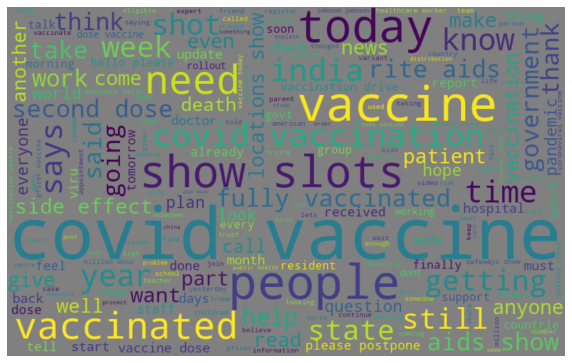

In [13]:
#plotting neutral words according to Textblob polarity classification
neu_words =' '.join([text for text in n_df['text'][n_df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='grey').generate(neu_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

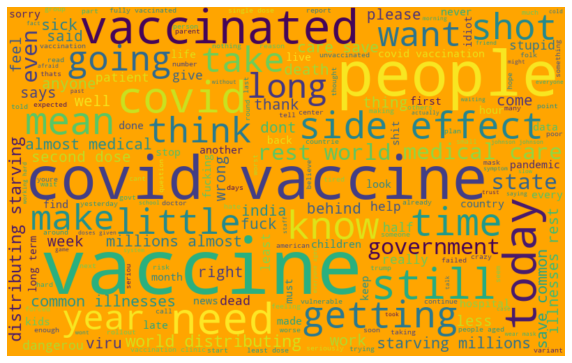

In [14]:
#plotting negative words
neg_words = ' '.join([text for text in n_df['text'][n_df['sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, background_color='orange').generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

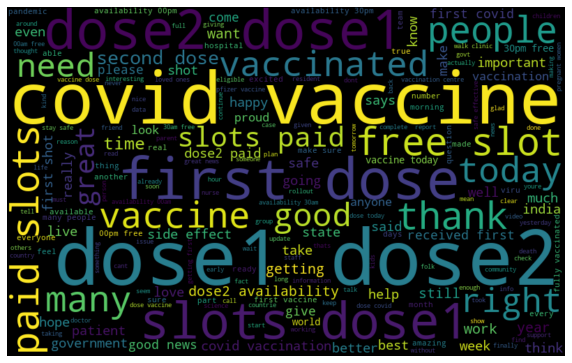

In [15]:
#plotting positive words 
pos_words = ' '.join([text for text in n_df['text'][n_df['sentiment'] > 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
import itertools
import collections
#count the most words shown up in pos_words
count_pos = collections.Counter(pos_words.split())
count_pos.most_common(15)

[('vaccine', 26237),
 ('first', 17663),
 ('covid', 17087),
 ('dose', 9664),
 ('people', 9429),
 ('dose1', 8800),
 ('dose2', 8796),
 ('today', 8670),
 ('free', 7312),
 ('slots', 7060),
 ('vaccinated', 6706),
 ('vaccination', 6386),
 ('vaccines', 5968),
 ('good', 5907),
 ('great', 5551)]

In [17]:
count_neg = collections.Counter(neg_words.split())
count_neg.most_common(15)

[('vaccine', 7847),
 ('covid', 5410),
 ('people', 4624),
 ('vaccinated', 2445),
 ('vaccination', 2026),
 ('dose', 1914),
 ('vaccines', 1880),
 ('getting', 1765),
 ('like', 1676),
 ('today', 1640),
 ('long', 1613),
 ('aged', 1442),
 ('doses', 1363),
 ('need', 1316),
 ('know', 1275)]

In [18]:
count_neu = collections.Counter(neu_words.split())
count_neu.most_common(15)

[('vaccine', 27021),
 ('covid', 20076),
 ('vaccinated', 7929),
 ('people', 7505),
 ('vaccination', 7049),
 ('today', 6101),
 ('vaccines', 5944),
 ('dose', 5176),
 ('getting', 4308),
 ('please', 4222),
 ('doses', 3998),
 ('health', 3801),
 ('show', 3742),
 ('need', 3501),
 ('second', 3437)]

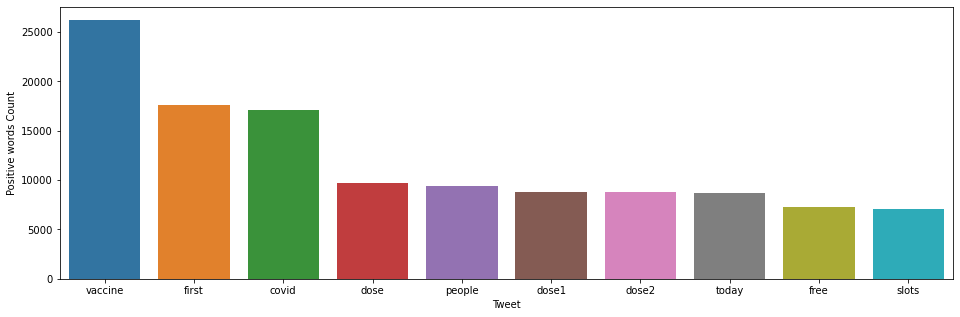

In [19]:
import seaborn as sns
a = nltk.FreqDist(count_pos)
d = pd.DataFrame({'Tweet': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Tweet", y = "Count")
ax.set(ylabel = 'Positive words Count')
plt.show()

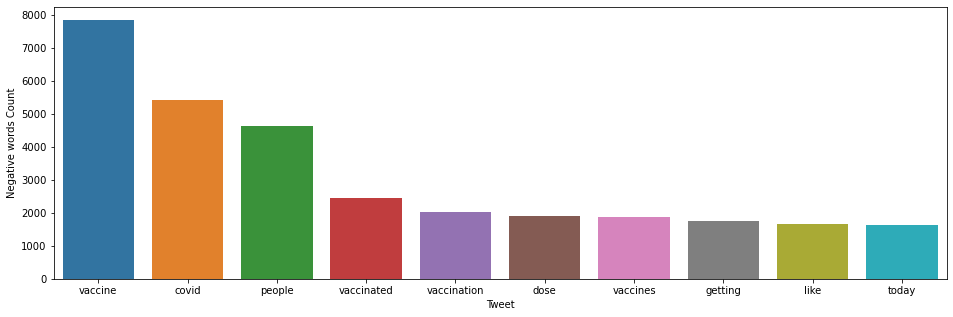

In [20]:
b = nltk.FreqDist(count_neg)
e = pd.DataFrame({'Tweet': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent words    
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Tweet", y = "Count")
ax.set(ylabel = 'Negative words Count')
plt.show()

In [21]:
SentimentText = n_df['text']
sentiment_text_list = SentimentText
textfile = open("../Resources/sentiment_text_list_train.txt", "w")
for element in sentiment_text_list:
    textfile.write(element + "\n")
textfile.close()

In [22]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text( j, i, format(cm[i, j, ], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
#Vectorizer 1: Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

CountVectorizer is a tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. The value of each cell is nothing but the count of the word in that particular text sample.

In [24]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)

In [25]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = n_df

y = train_data['sentiment']

In [26]:
y.shape

(297848,)

In [27]:
X.shape

(297848, 71844)

In [28]:
# splitting into training and testing set so as to evaluate the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). ... Naive Bayes classifier is a collection of many algorithms where all the algorithms share one common principle, and that is each feature being classified is not related to any other feature. If the feature vectors have n elements and each of them can assume k different values with probability pk, then:

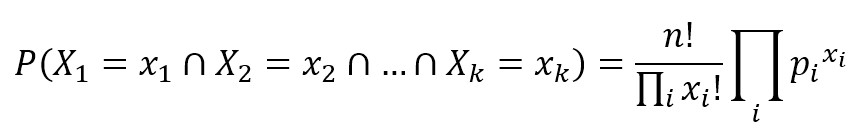

https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/

Multinomial Naive Bayes Explained: Function, Advantages & Disadvantages, Applications: https://www.upgrad.com/blog/multinomial-naive-bayes-explained/

Multinomial Naive Bayes classification algorithm tends to be a baseline solution for sentiment analysis task. The basic idea of Naive Bayes technique is to find the probabilities of classes assigned to texts by using the joint probabilities of words and classes.

In [29]:
# fitting the multinomial bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [30]:
clf.score(X_train,y_train)

0.9114227918649644

In [31]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.8768004028873594

Confusion matrix, without normalization
[[ 5886   424  1727]
 [  877 23487  3059]
 [  825   427 22858]]
Normalized confusion matrix
[[0.732 0.053 0.215]
 [0.032 0.856 0.112]
 [0.034 0.018 0.948]]


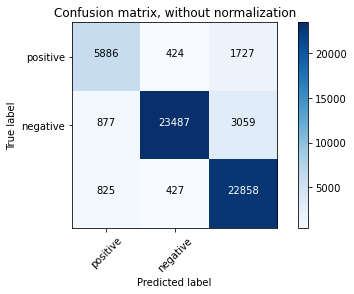

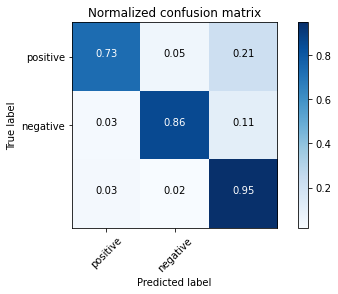

In [32]:
# Compute confusion matrix
   
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Scraping the most recent Twitter data via Twitter API to test the change of sentiment on twitter 

In [33]:
import tweepy as tw
import config
from tqdm import tqdm
import os

In [34]:
consumer_api_key = config.consumer_key
consumer_api_secret = config.consumer_secret

In [35]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [36]:
search_words = "#covidvaccine -filter:retweets" 

date_since = "2021-09-03"
date_until="2021-09-10"
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,
              until=date_until     
              ).items(10000)

In [37]:
tweets_copy = []
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

3022it [01:08, 43.83it/s]


In [38]:
print(f"New tweets retrieved: {len(tweets_copy)}")

New tweets retrieved: 3022


In [39]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': tweet.text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index = [0]))
    

100%|██████████| 3022/3022 [00:11<00:00, 263.83it/s]


In [40]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,THE COVID DYSTOPIA,,"“There was truth and there was untruth, and if...",2019-06-02 14:50:35,149,43,3120,False,2021-09-09 23:59:50,This is all thanks to the majority complying a...,"[Covid_19, COVID19, COVID, Covid19UK]",Twitter for Android,False
0,Granny is vaxxed! ✌️💙🏳️‍🌈✊🏿,"Idaho, USA",Grandma has opinions and isn’t afraid to share...,2021-05-27 21:44:51,137,406,9433,False,2021-09-09 23:59:46,Check out Tommy's video! #CovidVaccine #Idaho...,"[CovidVaccine, Idaho, Mandates, TikTok]",Twitter for iPhone,False
0,#Don't get pregnant to begin with #TX,,Put Americans First Again #PAFA #MAGA #BuildTh...,2013-06-28 23:15:53,287,460,14628,False,2021-09-09 23:57:15,I haven't seen any doctors guaranteeing the #h...,"[health, futurebabies]",Twitter for Android,False
0,Bingo McGillicuddy,"Durant, OK",,2020-05-21 18:51:40,18,141,351,False,2021-09-09 23:57:15,10% vaccinated. 90% hypocrites! Don't let the...,[scientific],Twitter for Android,False
0,Steve,"VA, USA","I enjoy video games, pokemon, coins, and anime...",2010-03-30 04:09:39,140,286,2922,False,2021-09-09 23:56:46,Old info but still highly relevant to the #Cov...,"[Covid_19, SARSCoV2, CovidVaccine]",Twitter for iPhone,False


In [41]:
n_tweets_df = tweets_df.drop(columns = ['user_name', 'user_location','user_description','user_created',
                         'user_followers','user_friends','user_favourites','source','is_retweet'], axis = 1)
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-09 23:59:50,This is all thanks to the majority complying a...,"[Covid_19, COVID19, COVID, Covid19UK]"
0,False,2021-09-09 23:59:46,Check out Tommy's video! #CovidVaccine #Idaho...,"[CovidVaccine, Idaho, Mandates, TikTok]"
0,False,2021-09-09 23:57:15,I haven't seen any doctors guaranteeing the #h...,"[health, futurebabies]"
0,False,2021-09-09 23:57:15,10% vaccinated. 90% hypocrites! Don't let the...,[scientific]
0,False,2021-09-09 23:56:46,Old info but still highly relevant to the #Cov...,"[Covid_19, SARSCoV2, CovidVaccine]"


In [42]:
n_tweets_df['text'] = n_tweets_df['text'].map(lambda x: clean_tweet(x))
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-09 23:59:50,thanks majority complying waking,"[Covid_19, COVID19, COVID, Covid19UK]"
0,False,2021-09-09 23:59:46,check tommys video,"[CovidVaccine, Idaho, Mandates, TikTok]"
0,False,2021-09-09 23:57:15,havent seen doctors guaranteeing born men wome...,"[health, futurebabies]"
0,False,2021-09-09 23:57:15,10 vaccinated 90 hypocrites dont let use princ...,[scientific]
0,False,2021-09-09 23:56:46,old info still highly relevant late last year ...,"[Covid_19, SARSCoV2, CovidVaccine]"


In [43]:
#remove short words less than three letters 
n_tweets_df['text'] = n_tweets_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [44]:
n_tweets_df['hashtags'] = n_tweets_df['hashtags'].apply(lambda x: re.sub('\[.*?\]',' ', str(x)))
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-09 23:59:50,thanks majority complying waking,
0,False,2021-09-09 23:59:46,check tommys video,
0,False,2021-09-09 23:57:15,havent seen doctors guaranteeing born women,
0,False,2021-09-09 23:57:15,vaccinated hypocrites dont principals body,
0,False,2021-09-09 23:56:46,info still highly relevant late last year,


In [45]:
n_tweets_df['sentiment'] = np.array([ analyze_sentiment(tweet) for tweet in n_tweets_df['text'] ])
n_tweets_df

,user_verified,date,text,hashtags,sentiment
0,False,2021-09-09 23:59:50,thanks majority complying waking,,1
0,False,2021-09-09 23:59:46,check tommys video,,0
0,False,2021-09-09 23:57:15,havent seen doctors guaranteeing born women,,0
0,False,2021-09-09 23:57:15,vaccinated hypocrites dont principals body,,0
0,False,2021-09-09 23:56:46,info still highly relevant late last year,,1
...,...,...,...,...,...
0,False,2021-09-07 01:00:41,another milestone india administered covid vac...,None,0
0,False,2021-09-07 00:58:47,hard agency without taking options,None,-1
0,False,2021-09-07 00:57:45,,,0
0,False,2021-09-07 00:56:30,finally work echos cries sorrow seem dwelling ...,None,0


In [52]:
test_SentimentText = n_tweets_df['text']
test_sentiment_text_list = test_SentimentText
textfile = open("../Resources/sentiment_text_list_test.txt", "w")
for element in test_sentiment_text_list:
    textfile.write(element + "\n")
textfile.close()

In [53]:
X=vectorizer.fit_transform(test_SentimentText)
test_data = n_tweets_df
y= n_tweets_df['sentiment']

In [54]:
X.shape

(3022, 5024)

In [55]:
y.shape

(3022,)

In [56]:
# splitting into training and testing set so as to evaluate the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [57]:
# fitting the multinomial bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [58]:
clf.score(X_train,y_train)

0.9590401323955317

In [59]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.7801652892561983

Confusion matrix, without normalization
[[ 29  40  10]
 [ 20 269  20]
 [ 10  33 174]]
Normalized confusion matrix
[[0.367 0.506 0.127]
 [0.065 0.871 0.065]
 [0.046 0.152 0.802]]


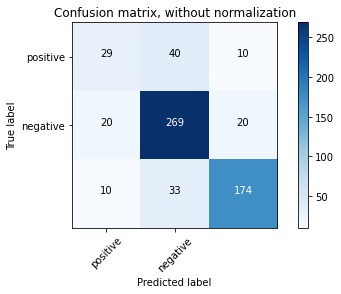

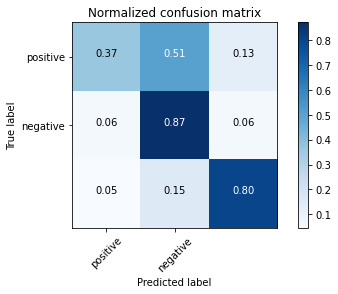

In [60]:
# Compute confusion matrix
import itertools    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()